# Dimensionality Reduction 

by DrCanbaz

### Why Do We Need to Reduce Dimensionality?

A high-dimensional dataset is a dataset that has a great number of columns (or variables). Such a dataset presents many mathematical or computational challenges. The good news is that variables (or called features) are often correlated — high-dimensional data are dominated “superficially” by a small number of simple variables. We can find a subset of the variables to represent the same level of information in the data or transform the variables to a new set of variables without losing much information. Although high-power computing can somehow handle high-dimensional data, in many applications it is still necessary to reduce the dimensionality of the original data.

#### Principal Component Analysis (PCA)

The idea of principal component analysis (PCA) is to reduce the dimensionality of a dataset consisting of a large number of related variables while retaining as much variance in the data as possible. PCA finds a set of new variables that the original variables are just their linear combinations. The new variables are called Principal Components (PCs). These principal components are orthogonal: In a 3-D case, the principal components are perpendicular to each other. X can not be represented by Y or Y cannot be presented by Z.

Let’s use the iris dataset to illustrate PCA:
    

In [4]:
# Use the iris dataset to illustrate PCA:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Notice this IRIS dataset comes with the target variable. In PCA, you only transform the X variables without the target Y variable.

**Standardization:** All the variables should be on the same scale before applying PCA, otherwise, a feature with large values will dominate the result. Below I use StandardScaler in scikit-learn to standardize the dataset’s features onto the unit scale (mean = 0 and variance = 1).

In [7]:
from sklearn.preprocessing import StandardScaler
variables = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, variables].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

In [9]:
x.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


There are four features in the original data. So PCA will provide the same number of principal components.


In [10]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397


What are the variances explained by each of the principal components? Use pca.explained_variance_ratio_ to return a vector of the variance:

In [12]:
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

It shows the first principal component accounts for 72.22% variance, the second, third and fourth account for 23.9%, 3.68%, and 0.51% variance respectively. We can say 72.22 + 23.9 = 96.21% of the information is captured by the first and second principal components. We often want to keep only the significant features and drop the insignificant ones. A rule of thumb is to keep the top principal components that capture significant variance and ignore the small ones.
We can plot the results using the first two components. Let’s append the target variable y to the new data x_pca:


In [13]:
x_pca['target']=y
x_pca.columns = ['PC1','PC2','PC3','PC4','target']
x_pca.head()

,PC1,PC2,PC3,PC4,target
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


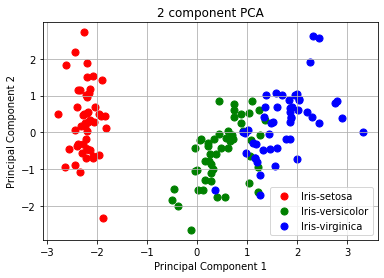

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
 indicesToKeep = x_pca['target'] == target
 ax.scatter(x_pca.loc[indicesToKeep, 'PC1']
 , x_pca.loc[indicesToKeep, 'PC2']
 , c = color
 , s = 50)
ax.legend(targets)
ax.grid()

How do we use PCA to detect outliers? Let me give you the intuition. After the transformation, the “normal” data points will align along the eigenvectors (new axes) with small eigenvalues. The outliers are far away from the eigenvectors with large eigenvalues. Therefore the distances between each data point to the eigenvectors become a measure for the outlier. A large distance indicates an anomaly. For more information, see “Anomaly Detection with PyOD”.

#### Kernel PCA (KPCA)
PCA applies linear transformation, which is just its limitation. Kernel PCA extends PCA to non-linearity. It first maps the original data to some nonlinear feature space (usually higher dimension), then applies PCA to extract the principal components in that space. This can be understood by Figure (B). The graph in the left shows the blue and red dots can not be separated using any linear transformation. But if all the dots are projected onto a 3D space, the result becomes linearly separable! We then apply PCA to separate the components.

The following Python code makes a circle plot consisting of red and blue dots. Obviously there is no way to separate the red and blue dots with a line (linear separation).

Automatically created module for IPython interactive environment


Text(0, 0.5, '$x_2$')

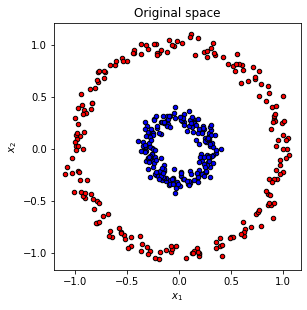

In [15]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles


np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1
plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

However, when we project the circle to a higher dimensional space and separate using PCA, the data observations against the first and second principal components are separable! Below is the result that the dots are plotted against the first and second principal components. I draw a line to separate the red and blue dots. In KernelPCA we specify kernel=’rbf’, which is the Radial Basis Function, or the Euclidean distance. The RBFs are commonly used as a kernel in machine learning techniques such as the Support Vector Machine (SVM).

Text(0, 0.5, '2nd component')

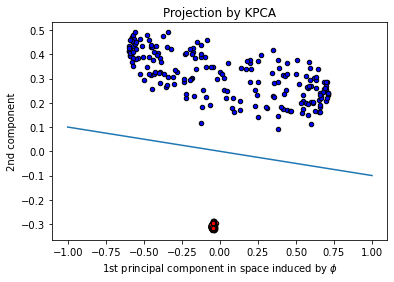

In [19]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
#pca = PCA()
#X_pca = pca.fit_transform(X)
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle='solid')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

If we specify the kernel to be “linear” as the code below (KernelPCA(kernel=’linear’), it becomes the standard PCA with only linear transformation, and the red and blue dots are not separable.

Text(0, 0.5, '2nd component')

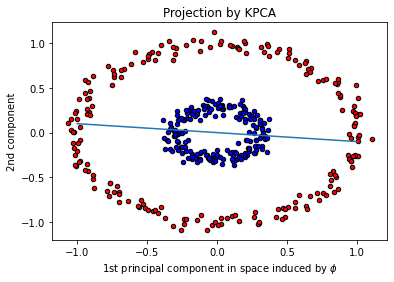

In [20]:
kpca = KernelPCA(kernel="linear", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
#pca = PCA()
#X_pca = pca.fit_transform(X)
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle='solid')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

### Linear Discriminant Analysis (LDA)

The origin of LDA is different from PCA. PCA is an unsupervised learning method that transforms the original features to a set of new features. We do not care about whether the new set of features can provide the best discriminatory power for the target variable. In contrast, Linear Discriminant Analysis (LDA) seeks to preserve as much discriminatory power as possible for the dependent variable, while projecting the original data matrix onto a lower-dimensional space. LDA is a type of supervised learning technique. It utilizes the classes in the dependent variable to divide the space of predictors into regions. All the regions should have linear boundaries. Thus the name linear comes from. The model predicts that all observations within a region belong to the same class of the dependent variable.

LDA achieves the above goal in three major steps. First, it calculates the separability between different classes of the dependent variable, which is called the between-class variance, as shown in (1) of Figure LDA. Second, it calculates the distance between the mean and the samples of each class, which is called the within-class variance, as shown in (2). Then it constructs the lower-dimensional space with this criterion: maximizing the between-class variance and minimizing the within-class variance. The solution to this criterion is to compute the eigenvalues and eigenvectors. The resulting eigenvectors represent the directions of the new space, and the corresponding eigenvalues represent the length of the eigenvectors. Thus, each eigenvector represents one axis of the LDA space, and the eigenvalue represents the length of that eigenvector.

Lets use the “Red Wine Quality” dataset in the Kaggle competition. This dataset has 11 input variables and one output variable ‘quality’.

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
# load dataset into Pandas DataFrame
wine = pd.read_csv(url,sep=";")   

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality2
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,2.096310
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.407354
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,2.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,2.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,2.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,3.000000


In [30]:
wine['quality2'] = np.where(wine['quality']<=4,1, np.where(wine['quality']<=6,2,3))

In [31]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


<AxesSubplot:>

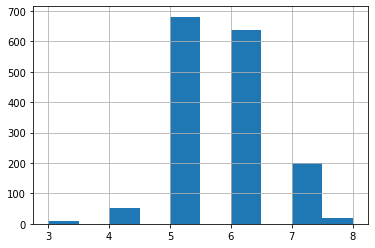

In [32]:
wine['quality'].hist()

<AxesSubplot:>

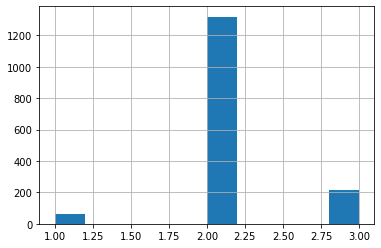

In [33]:
wine['quality2'].hist()

In [35]:
X = wine.drop(columns=['quality','quality2'])
y = wine['quality2']
target_names = np.unique(y)
target_names


array([1, 2, 3])

The following code performs PCA and LDA.


In [38]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

explained variance ratio (first two components): [0.94657698 0.0483683 ]


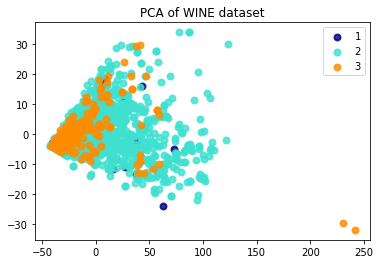

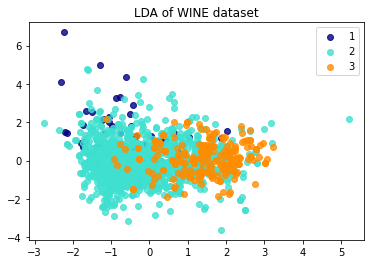

In [39]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
 % str(pca.explained_variance_ratio_))
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, target_names, target_names):
 plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
 label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of WINE dataset')
plt.figure()

for color, i, target_name in zip(colors, target_names, target_names):
 plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
 label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of WINE dataset')
plt.show()

### Singular Value Decomposition (SVD)

SVD is a data summary method similar to PCA. It extracts important features from data. But there is one more advantage of SVD: reconstructing the original dataset into a small dataset. So it has wide applications such as image compression. For example, if you have a 32\*32 = 1,024-pixel image, SVD can summary it into 66 pixels. The 66 pixels can retrieve 32\*32 pixel images without miss any important information.


Below I will again use the iris dataset to show you how to apply SVD.


In [45]:
from numpy import *
import operator
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import *

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
# Only the X variables
data = df[['sepal length','sepal width','petal length','petal width']]
data

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [46]:

#calculate SVD
n = 2 # We will take two Singular Values
U, s, V = linalg.svd( data )

# eye() creates a matrix with ones on the diagonal and zeros elsewhere
Sig = mat(eye(n)*s[:n])
newdata = U[:,:n]
newdata = pd.DataFrame(newdata)
newdata.columns=['SVD1','SVD2']
newdata.head()

,SVD1,SVD2
0,-0.061617,0.129969
1,-0.058072,0.111371
2,-0.056763,0.118295
3,-0.056654,0.105608
4,-0.061230,0.131431


You can compare the result of SVD to that of PCA. Both achieve similar outcomes.

In [ ]:
# Add the actual target to the data in order to plot it
newdata['target']=df['target']
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(‘SVD 1’) 
ax.set_ylabel(‘SVD 2’) 
ax.set_title(‘SVD’) 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = [‘r’, ‘g’, 'b']


for target, color in zip(targets,colors):
 indicesToKeep = newdata[‘target’] == target
 ax.scatter(newdata.loc[indicesToKeep, ‘SVD1’]
 , newdata.loc[indicesToKeep, ‘SVD2’]
 , c = color
 , s = 50)
ax.legend(targets)
ax.grid()